1º Primer Filtro: En la propia recopilacion de datos eliminamos todos los municipios con menos de 50.000 habitantes para tener un primer estimado

2º Segundo Filtro: Cargamos el data set de la demografia de estos municipios de mas de 50.000 habitantes y nos quedamos unicamente con los que hayan tenido una demografia creciente en los ultimos 5 años,tomando de referencia del año 2018 hasta el 2022(ambos incluidos).  

Dataset = COMBINACION_DEMOGRAFIA_MUNICIPIOS.xlsx

Descripcion = Demografia de los municipios con mas de 50000 habitantes 

Periodo = 2018-2022

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Comunidad autonoma | Comunidad autonoma a la que pertenece|Categorica nominal|2|
| Provincia | Provincia a la que pertenece |Categorica nominal |  1 |
| Municipio | El Municipio  |Categorica nominal| 0 |
|Columnas Año 2019-2022| Poblacion anual del municipio| Numerica continua | 0  |



In [16]:
import pandas as pd
##Cargamos el primer el archivo y lo leemos##

df1 = pd.read_excel("COMBINACION_DEMOGRAFIA_MUNICIPIOS.xlsx")
df1

,Comunidad Autónoma,Provincia,Municipo,2018,2019,2020,2021,2022
0,CASTILLA - LA MANCHA,Albacete,Albacete,173050,173329,174336,172722,172357
1,ANDALUCIA,Sevilla,Alcala de Guadaira,75256,75279,75533,75546,75917
2,"MADRID, COMUNIDAD DE",Madrid,Alcala de Henares,193751,195649,197562,195982,196888
3,"MADRID, COMUNIDAD DE",Madrid,Alcobendas,116037,117040,118417,116589,117041
4,"MADRID, COMUNIDAD DE",Madrid,Alcorcon,169502,170514,172384,170817,170296
...,...,...,...,...,...,...,...,...
140,CATALUNYA,Barcelona,Vilanova i la Geltru,66274,67086,67733,67458,68152
141,COMUNITAT VALENCIANA,Castellon,Vila-Real,50577,50893,51293,51130,51369
142,PAIS VASCO,Vitoria Gasteiz,Vitoria Gasteiz,249176,251774,253996,253093,253672
143,CASTILLA Y LEÓN,Zamora,Zamora,61827,61406,60988,60297,59475


In [82]:
##Comprobamos el nombre de las columnas##
nombres_columnas = df1.columns
print(nombres_columnas)

Index(['Comunidad Autónoma',         'Provincia ',          'Municipio',
                       2018,                 2019,                 2020,
                       2021,                 2022,        'Crecimiento'],
      dtype='object')


In [83]:
##Identifico un error en una de ellas, en vez de Municipio esta Municipo, lo corregimos para que no de problemas en siguientes pasos##
df1 = df1.rename(columns={'Municipo': 'Municipio'})
df1.head()

,Comunidad Autónoma,Provincia,Municipio,2018,2019,2020,2021,2022,Crecimiento
0,CASTILLA - LA MANCHA,Albacete,Albacete,173050.0,173329.0,174336.0,172722.0,172357,-693.0
1,ANDALUCIA,Sevilla,Alcala de Guadaira,75256.0,75279.0,75533.0,75546.0,75917,661.0
2,"MADRID, COMUNIDAD DE",Madrid,Alcala de Henares,193751.0,195649.0,197562.0,195982.0,196888,3137.0
3,"MADRID, COMUNIDAD DE",Madrid,Alcobendas,116037.0,117040.0,118417.0,116589.0,117041,1004.0
4,"MADRID, COMUNIDAD DE",Madrid,Alcorcon,169502.0,170514.0,172384.0,170817.0,170296,794.0


In [84]:
##Filtramos y creamos un nuevo dataframe solo con los municipios que hayan tenido demografia creciente en los ultimos 5 años##

#1º Primero convertimos las columnas de los años a numericos#
df1[[2018, 2019, 2020, 2021, 2022]] = df1[[2018, 2019, 2020, 2021, 2022]].apply(pd.to_numeric, errors='coerce')

#2º Una vez convertidas, vamos a filtrar y quedarnos solo con los municipios de crecimiento demografico#
df1['Crecimiento'] = df1[2022] - df1[2018]

#3º Creamos el nuevo data frame#
df_crecimiento_positivo = df1[df1['Crecimiento'] > 0]

#4º Eliminamos la columna temporal 'Crecimiento' para conservar la misma estructura del dataframe original#
df_crecimiento_positivo = df_crecimiento_positivo.drop(columns=['Crecimiento'])

#5º Imprimimos el dataframe y lo visualizamos#
print(df_crecimiento_positivo)





       Comunidad Autónoma       Provincia              Municipio      2018  \
1              ANDALUCIA          Sevilla     Alcala de Guadaira   75256.0   
2    MADRID, COMUNIDAD DE         Madrid       Alcala de Henares  193751.0   
3    MADRID, COMUNIDAD DE         Madrid              Alcobendas  116037.0   
4    MADRID, COMUNIDAD DE         Madrid                Alcorcon  169502.0   
6              ANDALUCIA           Cadiz               Algeciras  121414.0   
..                    ...              ...                   ...       ...   
139             CATALUNYA       Barcelona             Viladecans   66168.0   
140             CATALUNYA       Barcelona   Vilanova i la Geltru   66274.0   
141  COMUNITAT VALENCIANA        Castellon             Vila-Real   50577.0   
142            PAIS VASCO  Vitoria Gasteiz       Vitoria Gasteiz  249176.0   
144                ARAGÓN         Zaragoza              Zaragoza  666880.0   

         2019      2020      2021    2022  
1     75279.0   755

In [85]:
#Comprobamos la caracteristica de cada columna del dataframe nuevo para asegurarnos que esta todo correcto y como queremos#

df_crecimiento_positivo.dtypes

#Convertimos la columna 2022 en float#

df_crecimiento_positivo[2022] = df_crecimiento_positivo[2022].astype(float)

#Lo comprobamos de nuevo#
df_crecimiento_positivo.dtypes


Comunidad Autónoma     object
Provincia              object
Municipio              object
2018                  float64
2019                  float64
2020                  float64
2021                  float64
2022                  float64
dtype: object

3º Tercer filtro: De esos 95 municipios vamos a quedarnos unicamente con el top 10 con mayor numero de habitantes

Dataset = COMBINACION_DEMOGRAFIA_MUNICIPIOS.xlsx

Descripcion = Dataframe con los municipios que han tenido demografia creciente

Periodo = 2018-2022

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Comunidad autonoma | Comunidad autonoma a la que pertenece|Categorica nominal|2|
| Provincia | Provincia a la que pertenece |Categorica nominal |  1 |
| Municipio | El Municipio  |Categorica nominal| 0 |
|Columnas Año 2019-2022| Poblacion anual del municipio| Numerica continua | 0  |

In [86]:
#Creamos un nuevo dataframe con el top 10 de municipios con mas habitantes demograficamente creciente estos ultimos 5 años#
df_top_10 = df_crecimiento_positivo.nlargest(10,2022)
print(df_top_10)


       Comunidad Autónoma                  Provincia   \
76   MADRID, COMUNIDAD DE                      Madrid   
19              CATALUNYA                  Barcelona    
136  COMUNITAT VALENCIANA                    Valencia   
144                ARAGÓN                    Zaragoza   
77             ANDALUCIA                       Malaga   
87      MURCIA, REGIÓN DE                      Murcia   
92         BALEARS, ILLES           Palma de Mallorca   
66               CANARIAS  Las Palmas de Gran Canaria   
7    COMUNITAT VALENCIANA                   Alicante    
60              CATALUNYA                  Barcelona    

                      Municipio       2018       2019       2020       2021  \
76                       Madrid  3223334.0  3266126.0  3334730.0  3305408.0   
19                   Barcelona   1620343.0  1636762.0  1664182.0  1636732.0   
136                    Valencia   791413.0   794288.0   800215.0   789744.0   
144                    Zaragoza   666880.0   674997.0   

In [87]:
##Miramos la cardinalidad de las variables##
cardinalidad_top_10 = pd.DataFrame([df_top_10.nunique()/len(df_top_10)])* 100
cardinalidad_top_10

,Comunidad Autónoma,Provincia,Municipio,2018,2019,2020,2021,2022
0,80.0,90.0,100.0,100.0,100.0,100.0,100.0,100.0


In [88]:
#Vamos a calcular el porcentaje de crecimiento de cada municipio#
df_top_10['Crecimiento'] = ((df_top_10[2022] - df_top_10[2018]) / df_top_10[2018]) * 100
print(df_top_10['Crecimiento'])

76     1.782254
19     0.978188
136    0.136338
144    0.919206
77     1.409743
87     3.532566
92     1.532731
66     0.073973
7      2.111124
60     1.676192
Name: Crecimiento, dtype: float64


In [24]:
#Calculamos la media de las variables numericas#
df_top_10.describe().loc["mean"]



2018           870100.100000
2019           879588.500000
2020           892954.100000
2021           884494.100000
2022           882329.000000
Crecimiento         1.415231
Name: mean, dtype: float64

In [89]:
#Calculamos la mediana de las variables numericas#
df_top_10.describe().loc["50%"]

2018           509104.000000
2019           513956.000000
2020           518931.500000
2021           518877.000000
2022           521027.500000
Crecimiento         1.471237
Name: 50%, dtype: float64

In [90]:
##Vistazo cone el describe##
df_top_10.describe()

,2018,2019,2020,2021,2022,Crecimiento
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000
mean,8.701001e+05,8.795885e+05,8.929541e+05,8.844941e+05,8.823290e+05,1.415231
std,9.147528e+05,9.268693e+05,9.473703e+05,9.374576e+05,9.302250e+05,1.003084
min,2.610680e+05,2.649230e+05,2.693820e+05,2.646570e+05,2.654440e+05,0.073973
25%,3.863030e+05,3.889600e+05,3.915640e+05,3.888478e+05,3.880828e+05,0.933951
50%,5.091040e+05,5.139560e+05,5.189315e+05,5.188770e+05,5.210275e+05,1.471237
75%,7.602798e+05,7.644652e+05,7.706305e+05,7.611332e+05,7.626215e+05,1.755738
max,3.223334e+06,3.266126e+06,3.334730e+06,3.305408e+06,3.280782e+06,3.532566


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [92]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [95]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()


In [96]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [97]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [32]:
df_top_10

,Comunidad Autónoma,Provincia,Municipio,2018,2019,2020,2021,2022,Crecimiento
76,"MADRID, COMUNIDAD DE",Madrid,Madrid,3223334.0,3266126.0,3334730.0,3305408.0,3280782.0,1.782254
19,CATALUNYA,Barcelona,Barcelona,1620343.0,1636762.0,1664182.0,1636732.0,1636193.0,0.978188
136,COMUNITAT VALENCIANA,Valencia,Valencia,791413.0,794288.0,800215.0,789744.0,792492.0,0.136338
144,ARAGÓN,Zaragoza,Zaragoza,666880.0,674997.0,681877.0,675301.0,673010.0,0.919206
77,ANDALUCIA,Malaga,Malaga,571026.0,574654.0,578460.0,577405.0,579076.0,1.409743
87,"MURCIA, REGIÓN DE",Murcia,Murcia,447182.0,453258.0,459403.0,460349.0,462979.0,3.532566
92,"BALEARS, ILLES",Palma de Mallorca,Palma de Mallorca,409661.0,416065.0,422587.0,419366.0,415940.0,1.532731
66,CANARIAS,Las Palmas de Gran Canaria,Las Palmas de Gran Canaria,378517.0,379925.0,381223.0,378675.0,378797.0,0.073973
7,COMUNITAT VALENCIANA,Alicante,Alicante/Alacant,331577.0,334887.0,337482.0,337304.0,338577.0,2.111124
60,CATALUNYA,Barcelona,Hospitalet de Llobregat,261068.0,264923.0,269382.0,264657.0,265444.0,1.676192


In [33]:
b= df_top_10.sort_values(by="Crecimiento",ascending=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


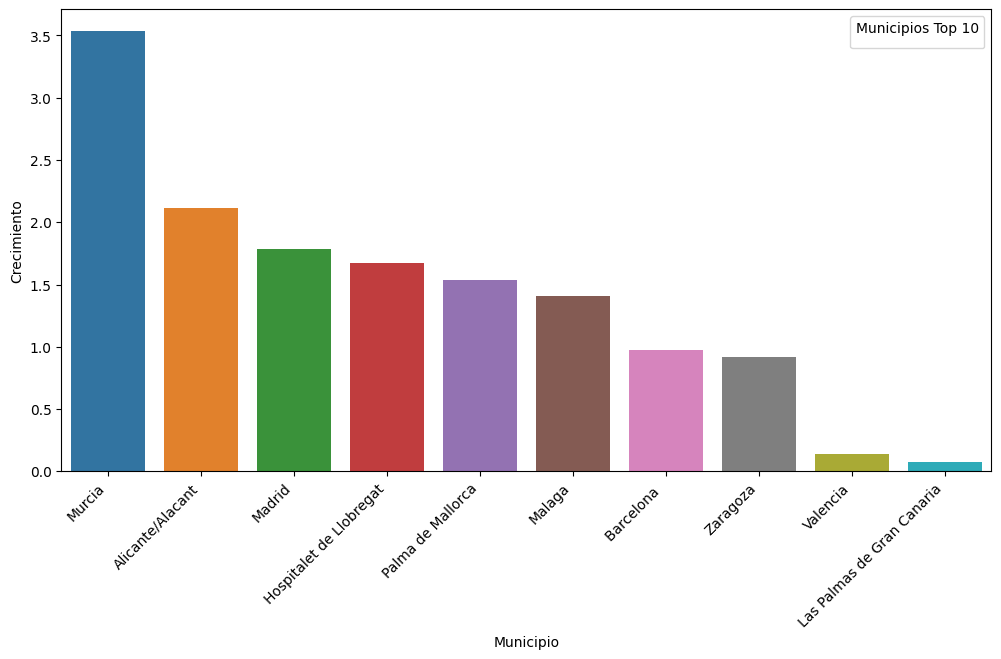

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=b.Municipio, y= b.Crecimiento, hue='Municipio', data=b)

# Ajustar la orientación de las etiquetas en el eje x y personalizar la leyenda
plt.xticks(rotation=45, ha='right')
plt.legend(title='Municipios Top 10')

# Mostrar el gráfico
plt.show()

In [99]:
columnas_numericas_top_10 = [2018,2019,2020,2021,2022]

(5, 2)


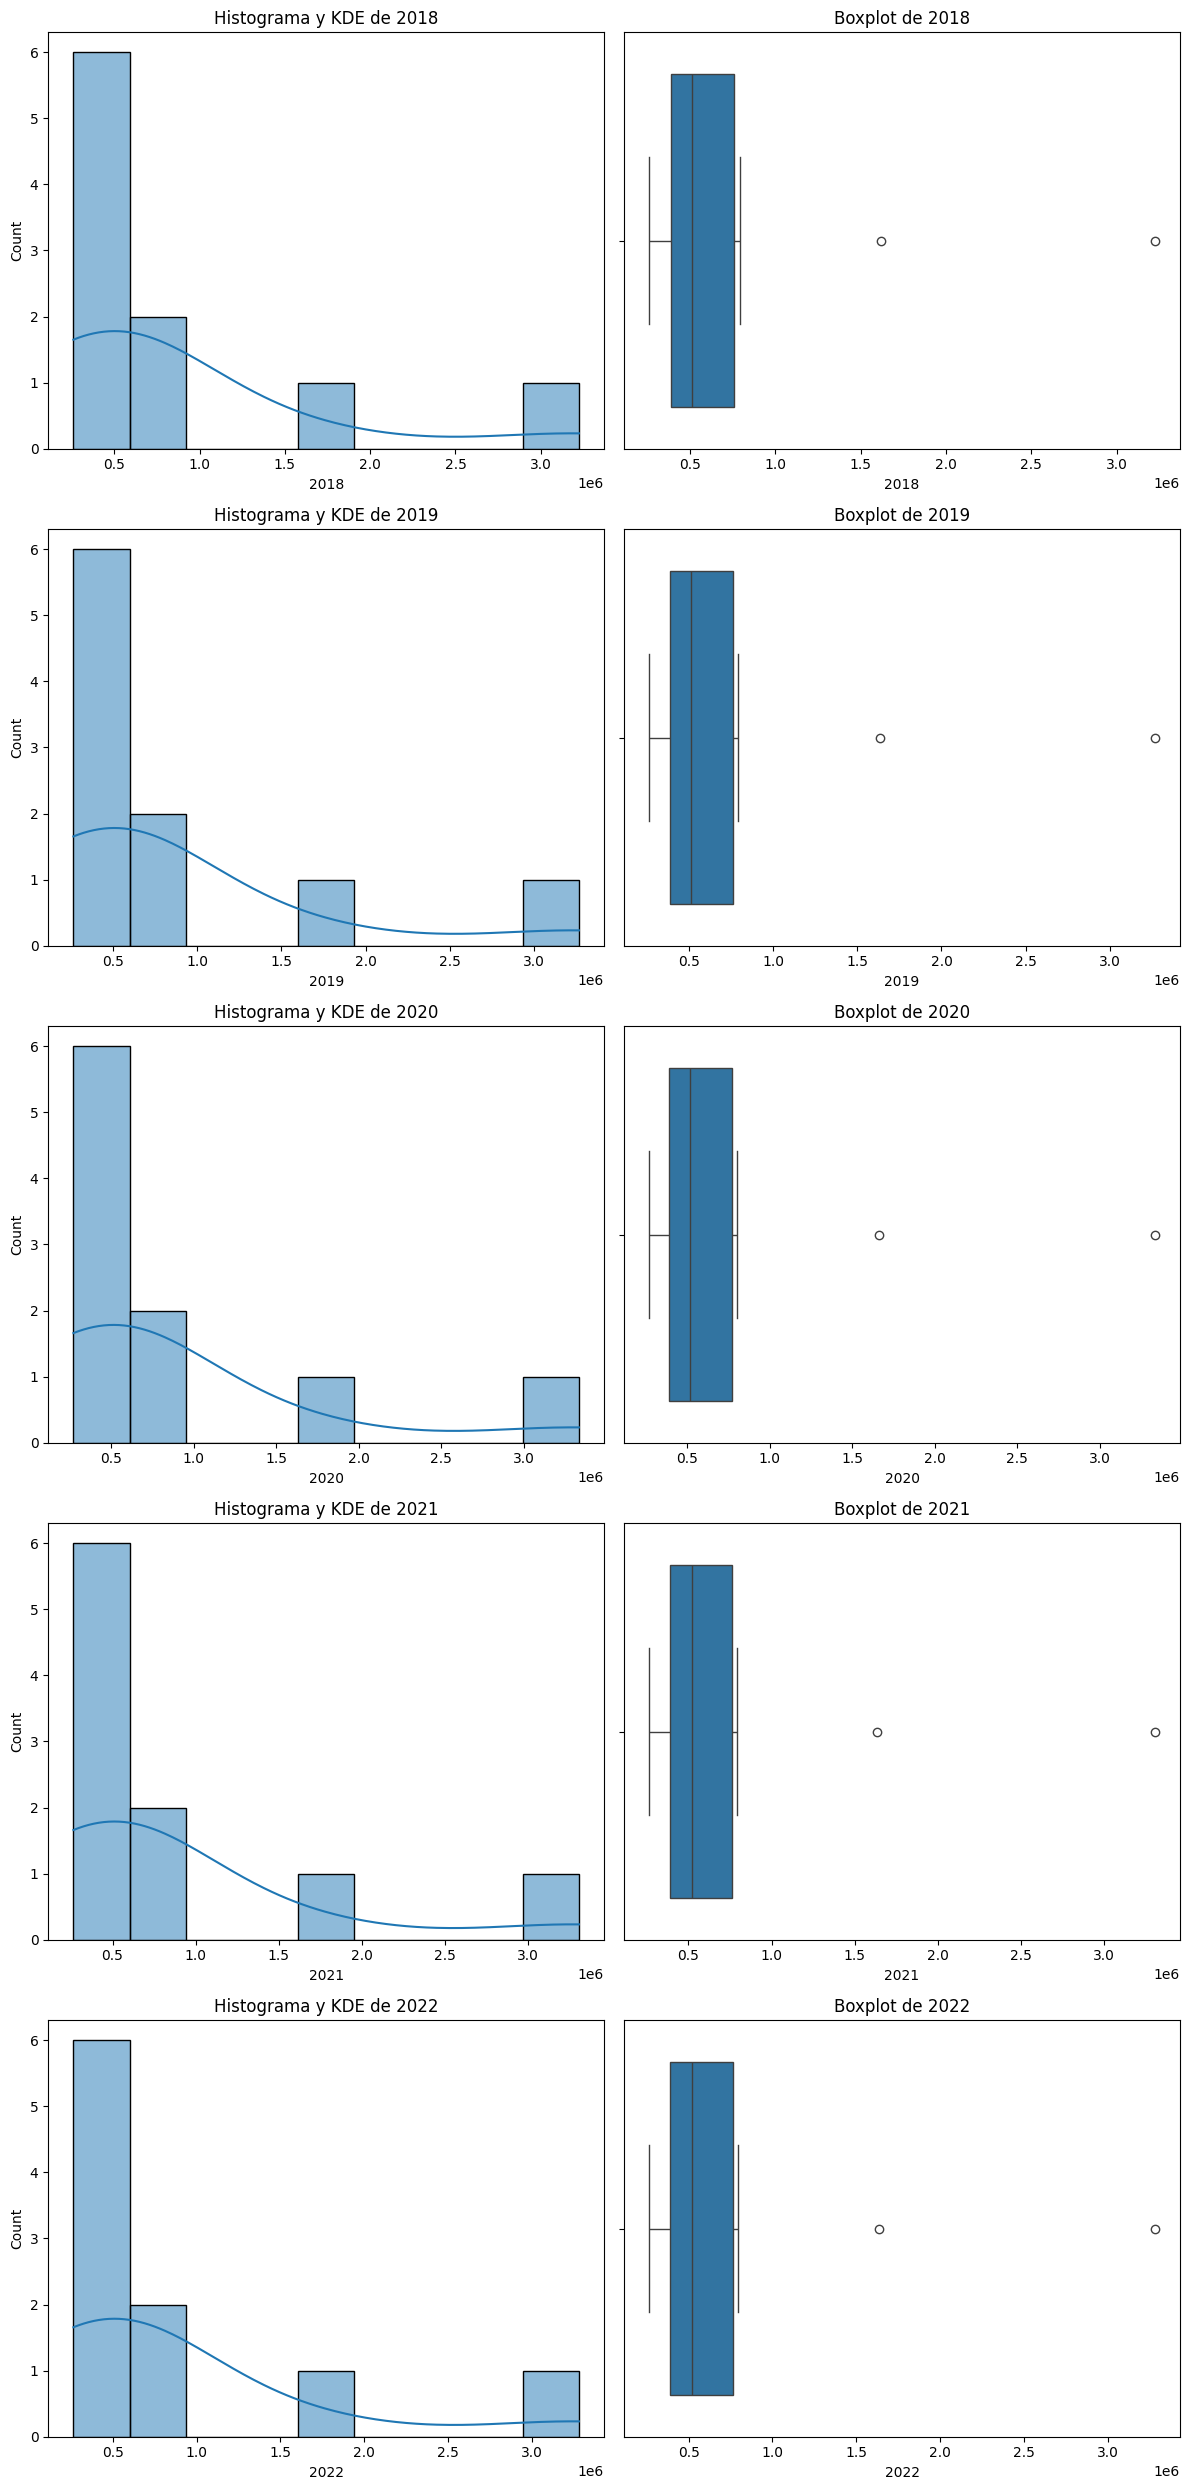

In [103]:
plot_combined_graphs(df_top_10, columns = columnas_numericas_top_10)

In [109]:
corr_matrix = df_top_10.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix

,2018,2019,2020,2021,2022,Crecimiento
2018,1.000000,0.999995,0.999980,0.999953,0.999976,-0.010296
2019,0.999995,1.000000,0.999994,0.999975,0.999989,-0.008268
2020,0.999980,0.999994,1.000000,0.999987,0.999991,-0.006080
2021,0.999953,0.999975,0.999987,1.000000,0.999992,-0.003594
2022,0.999976,0.999989,0.999991,0.999992,1.000000,-0.004229
Crecimiento,-0.010296,-0.008268,-0.006080,-0.003594,-0.004229,1.000000


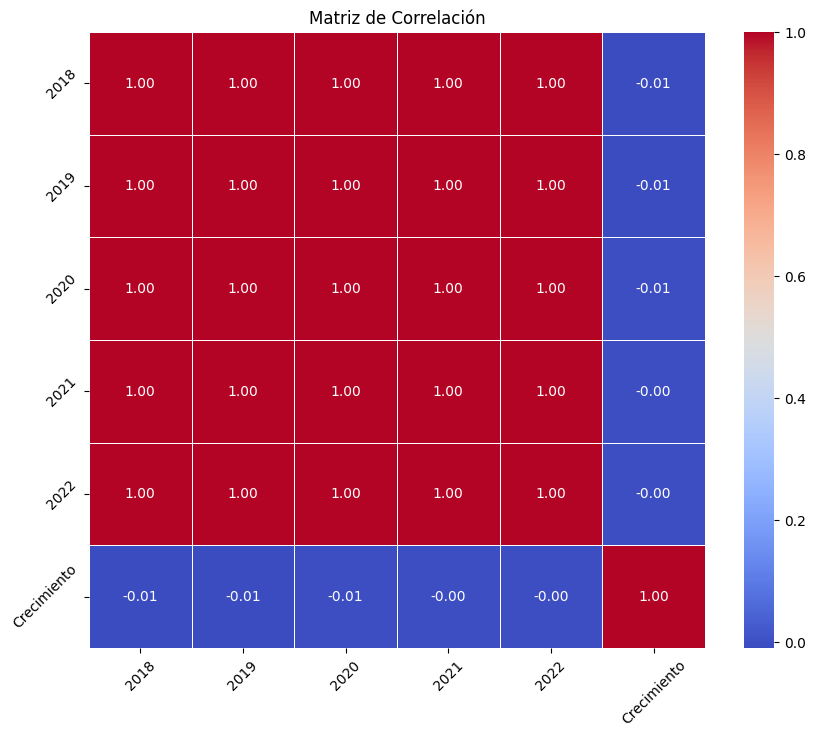

In [110]:
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

4º Tras esta primera exploracion y filtrado de los datos, de manera externa obtengo los datos de M2/EUR historico de los ultimos 5 años tanto en venta como alquiler por distrito de cada uno de estos 10 municipios

Dataset = Alicante.xlsx

Descripcion = Historico del precio venta/m2 y precio alquiler/m2 del Municipio, ordenado en distritos

Periodo = 2018-2023

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Municipio | El Municipio|Categorica nominal|2|
| Distrito | El distrito |Categorica nominal |  1 |
| Fecha | Ordenada por mes |Categorica nominal| 0 |
|Precio Venta| Precio venta por m2 del distrito| Numerica continua | 0  |
|Precio Alquiler| Precio del alquiler por 2 del distrito| Numerica continua | 0  |

In [111]:
#Tengo 10 archivos de Excel por municipio en el que estan todos los datos dividos por hojas para cada distrito de cada uno de ellos#

import pandas as pd
archivo_alicante = "./PRECIO_VENTA_MUNICIPIOS_23/Alicante.xlsx"

# Leer todas las hojas del archivo Excel
df_alicante = pd.read_excel(archivo_alicante, sheet_name=None)
# Crear un DataFrame combinando todas las hojas
 #df_completo_alicante = pd.concat(df_alicante.values(), ignore_index=True)

# Mostrar el DataFrame resultante
##print(df_completo_alicante)

columnas_fillna =["Municipio","Distrito","Numero distrito"]
columnas_fillna_sd= ["Municipio","Distrito"]



In [112]:
df_alicante

{' Benalua-La Florida':    Municipio                               Distrito      Fecha  Precio Venta  \
 0   Alicante   Benalua-La Florida-Babel-San Gabriel 2023-12-01          1702   
 1        NaN                                    NaN 2023-11-01          1682   
 2        NaN                                    NaN 2023-10-01          1660   
 3        NaN                                    NaN 2023-09-01          1631   
 4        NaN                                    NaN 2023-08-01          1584   
 ..       ...                                    ...        ...           ...   
 67       NaN                                    NaN 2018-05-01          1097   
 68       NaN                                    NaN 2018-04-01          1093   
 69       NaN                                    NaN 2018-03-01          1085   
 70       NaN                                    NaN 2018-02-01          1086   
 71       NaN                                    NaN 2018-01-01          1082   
 
   

In [113]:
def fillna_columnas(df,columnas_fillna):
    # Fill missing values with the first value in each columna
    for loop in df.keys():
        # rename columna Precio alquiler a Precio Alquiler
        df[loop].rename(columns={"Precio alquiler": "Precio Alquiler"}, inplace=True)
        # Fill missing values with the first value in each column
        for columna in columnas_fillna:
            df[loop][columna].fillna(df[loop][columna][0], inplace=True)
    # aqui se realizar el conac de todos sheets de excell
    df = pd.concat([df[d] for d in df.keys()],ignore_index=True)
    return df

df_completo_alicante_final = fillna_columnas(df_alicante, columnas_fillna)

In [39]:
df_completo_alicante_final

,Municipio,Distrito,Fecha,Precio Venta,Precio Alquiler,Numero distrito
0,Alicante,Benalua-La Florida-Babel-San Gabriel,2023-12-01,1702,9.3,3.0
1,Alicante,Benalua-La Florida-Babel-San Gabriel,2023-11-01,1682,9.4,3.0
2,Alicante,Benalua-La Florida-Babel-San Gabriel,2023-10-01,1660,9.4,3.0
3,Alicante,Benalua-La Florida-Babel-San Gabriel,2023-09-01,1631,9.2,3.0
4,Alicante,Benalua-La Florida-Babel-San Gabriel,2023-08-01,1584,9.2,3.0
...,...,...,...,...,...,...
715,Alicante,Virgen del Remedio-Juan Xxiii,2018-05-01,522 €/m2,NaN,2.0
716,Alicante,Virgen del Remedio-Juan Xxiii,2018-04-01,510 €/m2,NaN,2.0
717,Alicante,Virgen del Remedio-Juan Xxiii,2018-03-01,505 €/m2,NaN,2.0
718,Alicante,Virgen del Remedio-Juan Xxiii,2018-02-01,488 €/m2,NaN,2.0


In [40]:
##Nulos##
df_completo_alicante_final = df_completo_alicante_final.dropna(subset=['Precio Venta', 'Precio Alquiler'])

In [41]:
df_completo_alicante_final.isnull().sum()

Municipio          0
Distrito           0
Fecha              0
Precio Venta       0
Precio Alquiler    0
Numero distrito    0
dtype: int64

In [106]:
df_completo_alicante_final['Precio Venta'] = df_completo_alicante_final['Precio Venta'].str.replace(' €/m2', '').str.replace(',', '')
df_completo_alicante_final['Precio Venta'] = pd.to_numeric(df_completo_alicante_final['Precio Venta'], errors='coerce').fillna(0).astype(int)

# Eliminar el €/m2 y convertir la columna Precio Alquiler a float
df_completo_alicante_final['Precio Alquiler'] = df_completo_alicante_final['Precio Alquiler'].str.replace(' €/m2', '').str.replace(',', '')
df_completo_alicante_final['Precio Alquiler'] = pd.to_numeric(df_completo_alicante_final['Precio Alquiler'], errors='coerce').fillna(0).astype(float)


In [114]:
df_completo_alicante_final

,Municipio,Distrito,Fecha,Precio Venta,Precio Alquiler,Numero distrito
0,Alicante,Benalua-La Florida-Babel-San Gabriel,2023-12-01,1702,9.3,3.0
1,Alicante,Benalua-La Florida-Babel-San Gabriel,2023-11-01,1682,9.4,3.0
2,Alicante,Benalua-La Florida-Babel-San Gabriel,2023-10-01,1660,9.4,3.0
3,Alicante,Benalua-La Florida-Babel-San Gabriel,2023-09-01,1631,9.2,3.0
4,Alicante,Benalua-La Florida-Babel-San Gabriel,2023-08-01,1584,9.2,3.0
...,...,...,...,...,...,...
715,Alicante,Virgen del Remedio-Juan Xxiii,2018-05-01,522 €/m2,NaN,2.0
716,Alicante,Virgen del Remedio-Juan Xxiii,2018-04-01,510 €/m2,NaN,2.0
717,Alicante,Virgen del Remedio-Juan Xxiii,2018-03-01,505 €/m2,NaN,2.0
718,Alicante,Virgen del Remedio-Juan Xxiii,2018-02-01,488 €/m2,NaN,2.0


In [44]:
 #df_completo_alicante_final['Precio Venta'] = df_completo_alicante_final['Precio Venta'].str.replace(' €/m2', '').astype(int)
 #df_completo_alicante_final['Precio Alquiler'] = df_completo_alicante_final['Precio Alquiler'].str.replace(' €/m2', '').str.replace(',', '.').astype(float)


Dataset = Barcelona.xlsx

Descripcion = Historico del precio venta/m2 y precio alquiler/m2 del Municipio, ordenado en distritos

Periodo = 2018-2023

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Municipio | El Municipio|Categorica nominal|2|
| Distrito | El distrito |Categorica nominal |  1 |
| Fecha | Ordenada por mes |Categorica nominal| 0 |
|Precio Venta| Precio venta por m2 del distrito| Numerica continua | 0  |
|Precio Alquiler| Precio del alquiler por 2 del distrito| Numerica continua | 0  |

In [45]:
##Tratamos nulos##
#df_completo_alicante_final_sin_nulos = df_completo_alicante_final.dropna(subset=['Precio Venta', 'Precio Alquiler'])


In [46]:
#df_completo_alicante_final_sin_nulos

In [47]:
#df_completo_alicante_final_sin_nulos['Precio Venta'] = df_completo_alicante_final_sin_nulos['Precio Venta'].str.replace(' €/m2', '').astype(int)

# Eliminar '€/m' y reemplazar ',' por '.' en 'Precio Alquiler' y convertir a formato float
#df_completo_alicante_final_sin_nulos['Precio Alquiler'] = df_completo_alicante_final_sin_nulos['Precio Alquiler'].str.replace(' €/m', '').str.replace(',', '.').astype(float)

In [108]:
archivo_barcelona = "./PRECIO_VENTA_MUNICIPIOS_23/Barcelona.xlsx"

# Leer todas las hojas del archivo Excel
df_barcelona = pd.read_excel(archivo_barcelona, sheet_name=None)
# Crear un DataFrame combinando todas las hojas
#df_completo_barcelona = pd.concat(df_barcelona.values(), ignore_index=True)

# Mostrar el DataFrame resultante
#print(df_completo_barcelona)



In [49]:
df_barcelona

{'Ciutat Vella':     Municipio      Distrito      Fecha Precio Venta Precio Alquiler
 0   Barcelona  Ciutat Vella 2023-12-01   4.316 €/m2       23,8 €/m2
 1         NaN           NaN 2023-11-01   4.273 €/m2       23,4 €/m2
 2         NaN           NaN 2023-10-01   4.308 €/m2       23,1 €/m2
 3         NaN           NaN 2023-09-01   4.329 €/m2       23,1 €/m2
 4         NaN           NaN 2023-08-01   4.331 €/m2       22,6 €/m2
 ..        ...           ...        ...          ...             ...
 67        NaN           NaN 2018-05-01   4.469 €/m2       18,7 €/m2
 68        NaN           NaN 2018-04-01   4.448 €/m2       18,8 €/m2
 69        NaN           NaN 2018-03-01   4.463 €/m2       18,8 €/m2
 70        NaN           NaN 2018-02-01   4.502 €/m2       18,7 €/m2
 71        NaN           NaN 2018-01-01   4.544 €/m2       18,6 €/m2
 
 [72 rows x 5 columns],
 'Eixample':     Municipio  Distrito      Fecha Precio Venta Precio Alquiler
 0   Barcelona  Eixample 2023-12-01   5.097 €/m2     

In [50]:
df_barcelona_completo = fillna_columnas(df_barcelona,columnas_fillna_sd)

In [51]:
df_barcelona_completo.isna().sum()

Municipio          0
Distrito           0
Fecha              0
Precio Venta       0
Precio Alquiler    0
dtype: int64

In [52]:

df_barcelona_completo


,Municipio,Distrito,Fecha,Precio Venta,Precio Alquiler
0,Barcelona,Ciutat Vella,2023-12-01,4.316 €/m2,"23,8 €/m2"
1,Barcelona,Ciutat Vella,2023-11-01,4.273 €/m2,"23,4 €/m2"
2,Barcelona,Ciutat Vella,2023-10-01,4.308 €/m2,"23,1 €/m2"
3,Barcelona,Ciutat Vella,2023-09-01,4.329 €/m2,"23,1 €/m2"
4,Barcelona,Ciutat Vella,2023-08-01,4.331 €/m2,"22,6 €/m2"
...,...,...,...,...,...
715,Barcelona,Sarrià-Sant Gervasi,2018-05-01,5.323 €/m2,"16,8 €/m2"
716,Barcelona,Sarrià-Sant Gervasi,2018-04-01,5.308 €/m2,"16,8 €/m2"
717,Barcelona,Sarrià-Sant Gervasi,2018-03-01,5.269 €/m2,"16,6 €/m2"
718,Barcelona,Sarrià-Sant Gervasi,2018-02-01,5.249 €/m2,"16,5 €/m2"


In [55]:
df_completo_barcelona[["Municipio", "Distrito"]] = df_completo_barcelona[["Municipio","Distrito" ]].fillna("Barcelona","Ciutat Vella")

# 2. Modificar el formato de las columnas "Precio Venta" y "Precio Alquiler"


NameError: name 'df_completo_barcelona' is not defined

In [ ]:
##Sumar el total de los valores de la ultima##

Dataset = Hospitallet de Llobregat.xlsx

Descripcion = Historico del precio venta/m2 y precio alquiler/m2 del Municipio, ordenado en distritos

Periodo = 2018-2023

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Municipio | El Municipio|Categorica nominal|2|
| Distrito | El distrito |Categorica nominal |  1 |
| Fecha | Ordenada por mes |Categorica nominal| 0 |
|Precio Venta| Precio venta por m2 del distrito| Numerica continua | 0  |
|Precio Alquiler| Precio del alquiler por 2 del distrito| Numerica continua | 0  |
|Numero distrito| Distribucion al numero de distrito que pertenece| Numerica discreta| 1  |

In [56]:
archivo_hospitallet = "./PRECIO_VENTA_MUNICIPIOS_23/Hospitallet de Llobregat.xlsx"

# Leer todas las hojas del archivo Excel
df_hospitallet = pd.read_excel(archivo_hospitallet, sheet_name=None)
# Crear un DataFrame combinando todas las hojas
df_completo_hospitallet = pd.concat(df_hospitallet.values(), ignore_index=True)

# Mostrar el DataFrame resultante
print(df_completo_hospitallet)
df_completo_hospitallet.head(10)

                    Municipio   Distrito      Fecha Precio Venta  \
0    Hospitallet de Llobregat  Bellvitge 2023-12-01   2.303 €/m2   
1                         NaN        NaN 2023-11-01   2.303 €/m2   
2                         NaN        NaN 2023-10-01   2.291 €/m2   
3                         NaN        NaN 2023-09-01   2.272 €/m2   
4                         NaN        NaN 2023-08-01   2.325 €/m2   
..                        ...        ...        ...          ...   
571                       NaN        NaN 2018-05-01   2.626 €/m2   
572                       NaN        NaN 2018-04-01   2.574 €/m2   
573                       NaN        NaN 2018-03-01   2.541 €/m2   
574                       NaN        NaN 2018-02-01   2.598 €/m2   
575                       NaN        NaN 2018-01-01   2.582 €/m2   

    Precio Alquiler  Numero distrito  
0               NaN              6.0  
1               NaN              NaN  
2               NaN              NaN  
3               NaN        

,Municipio,Distrito,Fecha,Precio Venta,Precio Alquiler,Numero distrito
0,Hospitallet de Llobregat,Bellvitge,2023-12-01,2.303 €/m2,NaN,6.0
1,NaN,NaN,2023-11-01,2.303 €/m2,NaN,NaN
2,NaN,NaN,2023-10-01,2.291 €/m2,NaN,NaN
3,NaN,NaN,2023-09-01,2.272 €/m2,NaN,NaN
4,NaN,NaN,2023-08-01,2.325 €/m2,NaN,NaN
5,NaN,NaN,2023-07-01,2.333 €/m2,NaN,NaN
6,NaN,NaN,2023-06-01,2.329 €/m2,NaN,NaN
7,NaN,NaN,2023-05-01,2.267 €/m2,NaN,NaN
8,NaN,NaN,2023-04-01,2.222 €/m2,NaN,NaN
9,NaN,NaN,2023-03-01,2.267 €/m2,NaN,NaN


Dataset = Madrid.xlsx

Descripcion = Historico del precio venta/m2 y precio alquiler/m2 del Municipio, ordenado en distritos

Periodo = 2018-2023

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Municipio | El Municipio|Categorica nominal|2|
| Distrito | El distrito |Categorica nominal |  1 |
| Fecha | Ordenada por mes |Categorica nominal| 0 |
|Precio Venta| Precio venta por m2 del distrito| Numerica continua | 0  |
|Precio Alquiler| Precio del alquiler por 2 del distrito| Numerica continua | 0  |

In [57]:
archivo_madrid = "./PRECIO_VENTA_MUNICIPIOS_23/Madrid.xlsx"

# Leer todas las hojas del archivo Excel
df_madrid = pd.read_excel(archivo_madrid, sheet_name=None)

df_completo_madrid_final = fillna_columnas(df_madrid, columnas_fillna_sd)


In [ ]:
df_completo_madrid_final.isnull().sum()

Municipio          0
Distrito           0
Fecha              0
Precio Venta       0
Precio Alquiler    0
dtype: int64

In [58]:
# Eliminar el €/m2 y convertir las columnas Precio Venta y Precio Alquiler a float
df_completo_madrid_final['Precio Venta'] = df_completo_madrid_final['Precio Venta'].str.replace(' €/m2', '').str.replace(',', '.').astype(float)
df_completo_madrid_final['Precio Alquiler'] = df_completo_madrid_final['Precio Alquiler'].str.replace(' €/m2', '').str.replace(',', '.').astype(float)

# Agrupar por distrito y calcular la suma de Precio de Alquiler y la suma de Precio de Venta
grouped_df = df_completo_madrid_final.groupby('Distrito').agg({'Precio Alquiler': 'sum', 'Precio Venta': 'sum'}).reset_index()

# Calcular el índice y agregarlo como una nueva columna
grouped_df['Indice'] = grouped_df['Precio Alquiler'] / grouped_df['Precio Venta']

# Fusionar el DataFrame original con el DataFrame agrupado
df_completo_madrid_final_result = pd.merge(df_completo_madrid_final, grouped_df[['Distrito', 'Indice']], on='Distrito', how='left')



Dataset = Malaga.xlsx

Descripcion = Historico del precio venta/m2 y precio alquiler/m2 del Municipio, ordenado en distritos

Periodo = 2018-2023

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Municipio | El Municipio|Categorica nominal|2|
| Distrito | El distrito |Categorica nominal |  1 |
| Fecha | Ordenada por mes |Categorica nominal| 0 |
|Precio Venta| Precio venta por m2 del distrito| Numerica continua | 0  |
|Precio Alquiler| Precio del alquiler por 2 del distrito| Numerica continua | 0  |

In [59]:
archivo_malaga = "./PRECIO_VENTA_MUNICIPIOS_23/Malaga.xlsx"

# Leer todas las hojas del archivo Excel
df_malaga = pd.read_excel(archivo_malaga, sheet_name=None)
# Crear un DataFrame combinando todas las hojas
df_completo_malaga = pd.concat(df_malaga.values(), ignore_index=True)

# Mostrar el DataFrame resultante
print(df_completo_malaga)

    Municipio             Distrito      Fecha Precio Venta Precio Alquiler
0      Malaga  Bailén - Miraflores 2023-12-01   2.125 €/m2             NaN
1         NaN                  NaN 2023-11-01   2.126 €/m2             NaN
2         NaN                  NaN 2023-10-01   2.092 €/m2             NaN
3         NaN                  NaN 2023-09-01   2.071 €/m2             NaN
4         NaN                  NaN 2023-08-01   2.067 €/m2             NaN
..        ...                  ...        ...          ...             ...
716       NaN                  NaN 2018-05-01   2.052 €/m2        9,0 €/m2
717       NaN                  NaN 2018-04-01   2.049 €/m2        9,0 €/m2
718       NaN                  NaN 2018-03-01   2.039 €/m2        8,8 €/m2
719       NaN                  NaN 2018-02-01   2.001 €/m2        8,9 €/m2
720       NaN                  NaN 2018-01-01   1.992 €/m2        8,9 €/m2

[721 rows x 5 columns]


C:\Users\alvar\AppData\Local\Temp\ipykernel_2104\2199607174.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_completo_malaga = pd.concat(df_malaga.values(), ignore_index=True)


Dataset = Murcia.xlsx

Descripcion = Historico del precio venta/m2 y precio alquiler/m2 del Municipio, ordenado en distritos

Periodo = 2018-2023

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Municipio | El Municipio|Categorica nominal|2|
| Distrito | El distrito |Categorica nominal |  1 |
| Fecha | Ordenada por mes |Categorica nominal| 0 |
|Precio Venta| Precio venta por m2 del distrito| Numerica continua | 0  |
|Precio Alquiler| Precio del alquiler por 2 del distrito| Numerica continua | 0  |

In [60]:
archivo_murcia = "./PRECIO_VENTA_MUNICIPIOS_23/Murcia.xlsx"

# Leer todas las hojas del archivo Excel
df_murcia = pd.read_excel(archivo_murcia, sheet_name=None)
# Crear un DataFrame combinando todas las hojas
df_completo_murcia = pd.concat(df_murcia.values(), ignore_index=True)

# Mostrar el DataFrame result
print(df_completo_murcia)

    Municipio         Distrito      Fecha Precio Venta Precio Alquiler
0      Murcia  Campo de Murcia        NaT          NaN             NaN
1      Murcia           Centro 2023-12-01   2.093 €/m2        8,9 €/m2
2         NaN              NaN 2023-11-01   2.109 €/m2        8,8 €/m2
3         NaN              NaN 2023-10-01   2.118 €/m2        8,9 €/m2
4         NaN              NaN 2023-09-01   2.103 €/m2        8,8 €/m2
..        ...              ...        ...          ...             ...
428       NaN              NaN 2018-05-01   1.142 €/m2        5,9 €/m2
429       NaN              NaN 2018-04-01   1.130 €/m2        5,9 €/m2
430       NaN              NaN 2018-03-01   1.129 €/m2        5,8 €/m2
431       NaN              NaN 2018-02-01   1.123 €/m2        6,0 €/m2
432       NaN              NaN 2018-01-01   1.144 €/m2        6,2 €/m2

[433 rows x 5 columns]


C:\Users\alvar\AppData\Local\Temp\ipykernel_2104\929586286.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_completo_murcia = pd.concat(df_murcia.values(), ignore_index=True)


Dataset = Valencia.xlsx

Descripcion = Historico del precio venta/m2 y precio alquiler/m2 del Municipio, ordenado en distritos

Periodo = 2018-2023

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Municipio | El Municipio|Categorica nominal|2|
| Distrito | El distrito |Categorica nominal |  1 |
| Fecha | Ordenada por mes |Categorica nominal| 0 |
|Precio Venta| Precio venta por m2 del distrito| Numerica continua | 0  |
|Precio Alquiler| Precio del alquiler por 2 del distrito| Numerica continua | 0  |

In [61]:
archivo_valencia = "./PRECIO_VENTA_MUNICIPIOS_23/Valencia.xlsx"

# Leer todas las hojas del archivo Excel
df_valencia = pd.read_excel(archivo_valencia, sheet_name=None)
# Crear un DataFrame combinando todas las hojas
df_completo_valencia = pd.concat(df_valencia.values(), ignore_index=True)

# Mostrar el DataFrame result
print(df_completo_valencia)

     Municipio Distrito      Fecha Precio Venta Precio Alquiler  \
0     Valencia  Algiros 2023-12-01   2.273 €/m2       12,4 €/m2   
1          NaN      NaN 2023-11-01   2.256 €/m2       11,9 €/m2   
2          NaN      NaN 2023-10-01   2.290 €/m2       11,9 €/m2   
3          NaN      NaN 2023-09-01   2.294 €/m2       11,9 €/m2   
4          NaN      NaN 2023-08-01   2.324 €/m2       11,9 €/m2   
...        ...      ...        ...          ...             ...   
1147       NaN      NaN 2018-05-01   1.000 €/m2        6,4 €/m2   
1148       NaN      NaN 2018-04-01     991 €/m2        6,3 €/m2   
1149       NaN      NaN 2018-03-01     988 €/m2        6,3 €/m2   
1150       NaN      NaN 2018-02-01     978 €/m2        6,0 €/m2   
1151       NaN      NaN 2018-01-01     939 €/m2        5,9 €/m2   

      Numero distrito  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
1147              NaN  
114

Dataset = Vitoria Gasteiz.xlsx

Descripcion = Historico del precio venta/m2 y precio alquiler/m2 del Municipio, ordenado en distritos

Periodo = 2018-2023

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Municipio | El Municipio|Categorica nominal|2|
| Distrito | El distrito |Categorica nominal |  1 |
| Fecha | Ordenada por mes |Categorica nominal| 0 |
|Precio Venta| Precio venta por m2 del distrito| Numerica continua | 0  |
|Precio Alquiler| Precio del alquiler por 2 del distrito| Numerica continua | 0  |
|Numero distrito| Distribucion al numero de distrito que pertenece| Numerica discreta| 1  |

In [62]:
archivo_vitoria = "./PRECIO_VENTA_MUNICIPIOS_23/Vitoria Gasteiz.xlsx"

# Leer todas las hojas del archivo Excel
df_vitoria = pd.read_excel(archivo_vitoria, sheet_name=None)
# Crear un DataFrame combinando todas las hojas
df_completo_vitoria = pd.concat(df_vitoria.values(), ignore_index=True)

# Mostrar el DataFrame result
print(df_completo_vitoria)

            Municipio                Distrito      Fecha Precio Venta  \
0     Vitoria-Gasteiz  Adurtza - Aretxabaleta 2023-12-01   2.581 €/m2   
1                 NaN                     NaN 2023-11-01   2.533 €/m2   
2                 NaN                     NaN 2023-10-01   2.504 €/m2   
3                 NaN                     NaN 2023-09-01   2.572 €/m2   
4                 NaN                     NaN 2023-08-01   2.590 €/m2   
...               ...                     ...        ...          ...   
1221              NaN                     NaN 2018-04-01          NaN   
1222              NaN                     NaN 2018-03-01          NaN   
1223              NaN                     NaN 2018-02-01          NaN   
1224              NaN                     NaN 2018-01-01          NaN   
1225  Vitoria-Gasteiz     Zona rural noroeste        NaT          NaN   

     Precio Alquiler  Numero de distrito  
0                NaN                 4.0  
1                NaN                 

C:\Users\alvar\AppData\Local\Temp\ipykernel_2104\2586106679.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_completo_vitoria = pd.concat(df_vitoria.values(), ignore_index=True)


Dataset = Zaragoza.xlsx

Descripcion = Historico del precio venta/m2 y precio alquiler/m2 del Municipio, ordenado en distritos

Periodo = 2018-2023

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Municipio | El Municipio|Categorica nominal|2|
| Distrito | El distrito |Categorica nominal |  1 |
| Fecha | Ordenada por mes |Categorica nominal| 0 |
|Precio Venta| Precio venta por m2 del distrito| Numerica continua | 0  |
|Precio Alquiler| Precio del alquiler por 2 del distrito| Numerica continua | 0  |

In [63]:
archivo_zaragoza = "./PRECIO_VENTA_MUNICIPIOS_23/Zaragoza.xlsx"

# Leer todas las hojas del archivo Excel
df_zaragoza = pd.read_excel(archivo_zaragoza, sheet_name=None)
# Crear un DataFrame combinando todas las hojas
df_completo_zaragoza = pd.concat(df_zaragoza.values(), ignore_index=True)

# Mostrar el DataFrame result
print(df_completo_zaragoza)

     Municipio Distrito      Fecha Precio Venta Precio Alquiler
0     Zaragoza    Actur 2023-12-01   2.201 €/m2             NaN
1          NaN      NaN 2023-11-01   2.230 €/m2        8,5 €/m2
2          NaN      NaN 2023-10-01   2.212 €/m2        8,6 €/m2
3          NaN      NaN 2023-09-01   2.207 €/m2        8,5 €/m2
4          NaN      NaN 2023-08-01   2.240 €/m2        8,6 €/m2
...        ...      ...        ...          ...             ...
1436       NaN      NaN 2018-05-01   1.808 €/m2        7,7 €/m2
1437       NaN      NaN 2018-04-01   1.834 €/m2        7,5 €/m2
1438       NaN      NaN 2018-03-01   1.828 €/m2        7,6 €/m2
1439       NaN      NaN 2018-02-01   1.703 €/m2        7,8 €/m2
1440       NaN      NaN 2018-01-01   1.639 €/m2        7,8 €/m2

[1441 rows x 5 columns]


C:\Users\alvar\AppData\Local\Temp\ipykernel_2104\2510909655.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_completo_zaragoza = pd.concat(df_zaragoza.values(), ignore_index=True)


5º Una vez trabajados los datos de precio venta/alquiler por distrito de los Municipios Top 10 vamos a cargar los archivos de la renta per capita historica ultimos 5 años de cada Municipio dividido en distritos

Dataset = renta_per_capita_alicante.xlsx

Descripcion = Historico de los ultimos 5 años de la renta per capita del Municipio por distrito

Periodo = 2017-2021

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Municipio | El Municipio al que pertenecen los distritos|Categorica nominal|2|
| Numero distrito | El numero de distrito al que pertenece |Categorica nominal |  1 |
| Columnas de los años(2017-2021) | Columnas de la renta per capita por cada año de 2017-2021  |Numerica continua| 0 |


In [64]:
archivo_renta_alicante = "./Renta_per_capita_distrito_top10/renta_per_capita_alicante.xlsx"

# Leer todas las hojas del archivo Excel
df_renta_alicante = pd.read_excel(archivo_renta_alicante, sheet_name="Alicante")
df_renta_alicante


,Municipio,Numero distrito,2017,2018,2019,2020,2021
0,Alicante,1,21736,21581,21462,21313,21089
1,NaN,2,17116,17128,17341,17373,17338
2,NaN,3,16599,16635,16802,17023,16872
3,NaN,4,24841,25007,25402,25795,25986
4,NaN,5,15933,16094,16328,16464,19587


In [65]:
##Tratamos los nulos##
columna_Municipio = "Municipio"

# Valor con el que deseas llenar los valores nulos
valor_a_llenar = "Alicante"

# Rellenar los valores nulos en la columna categórica y actualizar el DataFrame
df_renta_alicante[columna_Municipio] = df_renta_alicante[columna_Municipio].fillna("Alicante")

In [ ]:
df_renta_alicante

,Municipio,Numero distrito,2017,2018,2019,2020,2021
0,Alicante,1,21736,21581,21462,21313,21089
1,Alicante,2,17116,17128,17341,17373,17338
2,Alicante,3,16599,16635,16802,17023,16872
3,Alicante,4,24841,25007,25402,25795,25986
4,Alicante,5,15933,16094,16328,16464,19587


In [ ]:
df_renta_alicante.describe()

,Numero distrito,2017,2018,2019,2020,2021
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,19245.000000,19289.000000,19467.000000,19593.600000,20174.400000
std,1.581139,3873.744894,3868.799879,3894.857892,3960.654719,3671.077403
min,1.000000,15933.000000,16094.000000,16328.000000,16464.000000,16872.000000
25%,2.000000,16599.000000,16635.000000,16802.000000,17023.000000,17338.000000
50%,3.000000,17116.000000,17128.000000,17341.000000,17373.000000,19587.000000
75%,4.000000,21736.000000,21581.000000,21462.000000,21313.000000,21089.000000
max,5.000000,24841.000000,25007.000000,25402.000000,25795.000000,25986.000000


In [66]:
##Vemos la variabilidad##
def variabilidad(df):
    df_var = df.describe().loc [["std","mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var

In [ ]:
variabilidad(df_renta_alicante)

,std,mean,CV
Numero distrito,1.581139,3.0,0.527046
2017,3873.744894,19245.0,0.201286
2018,3868.799879,19289.0,0.200570
2019,3894.857892,19467.0,0.200075
2020,3960.654719,19593.6,0.202140
2021,3671.077403,20174.4,0.181967


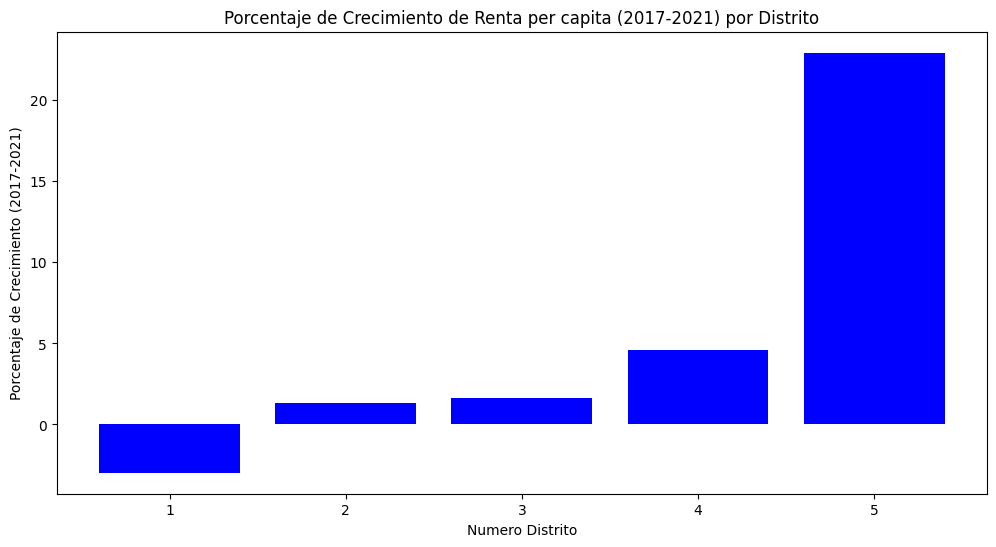

In [69]:
# Calcular el porcentaje de crecimiento para cada distrito
df_renta_alicante['2017_2021_crecimiento'] = ((df_renta_alicante[2021] - df_renta_alicante[2017]) / df_renta_alicante[2017]) * 100

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_renta_alicante['Numero distrito'], df_renta_alicante['2017_2021_crecimiento'], color='blue')
plt.xlabel('Numero Distrito')
plt.ylabel('Porcentaje de Crecimiento (2017-2021)')
plt.title('Porcentaje de Crecimiento de Renta per capita (2017-2021) por Distrito')
plt.show()

##Claramente el distrito numero 5 es el que mas crecimiento tiene##

In [68]:
#Vamos a calcular el porcentaje de crecimiento de cada Distrito#
df_renta_alicante['Crecimiento'] = ((df_renta_alicante[2021] - df_renta_alicante[2017]) / df_renta_alicante[2017]) * 100
print(df_renta_alicante['Crecimiento'])


0    -2.976629
1     1.297032
2     1.644677
3     4.609315
4    22.933534
Name: Crecimiento, dtype: float64


Dataset = renta_per_capita_barcelona.xlsx

Descripcion = Historico de los ultimos 5 años de la renta per capita del Municipio por distrito

Periodo = 2017-2021

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Distrito | El distrito|Categorica nominal|1|
| Columnas de los años(2017-2021) | Columnas de la renta per capita por cada año de 2017-2021  |Numerica continua| 0 |
|Municipio | El Municipio al que pertenecen los distritos |Categorica nominal |  2 |

In [ ]:
archivo_renta_barcelona = "./Renta_per_capita_distrito_top10/renta_per_capita_barcelona.xlsx"

# Leer todas las hojas del archivo Excel
df_renta_barcelona = pd.read_excel(archivo_renta_barcelona, sheet_name="Barcelona")
df_renta_barcelona 

,Distrito,2017,2018,2019,2020,2021,Municipio
0,Ciudad Vieja,20277,20143,20686,21572,21166,Barcelona
1,Nou barris,19468,18310,17284,17604,17398,NaN
2,Eixample,26642,26487,26951,27033,26435,NaN
3,Horta Guinardo,25598,24217,24499,24921,24600,NaN
4,Les corts,23005,22970,23137,23344,22711,NaN
5,Sant Andreu,20271,20387,20617,20923,20713,NaN
6,Sant Marti,23551,23596,21576,23972,23825,NaN
7,Sants-Montjuic,20212,20145,20455,20825,20485,NaN
8,Sarria Sant Gervasi,21904,21390,21911,22168,21716,NaN


In [ ]:
##Tratamos los nulos##
columna_Municipio_b = "Municipio"

# Valor con el que deseas llenar los valores nulos
valor_a_llenar_b = "Barcelona"

# Rellenar los valores nulos en la columna categórica y actualizar el DataFrame
df_renta_barcelona[columna_Municipio] = df_renta_barcelona[columna_Municipio].fillna("Barcelona")

In [ ]:
#Vamos a calcular el porcentaje de crecimiento de cada municipio#
df_renta_barcelona['Crecimiento'] = ((df_renta_barcelona[2021] - df_renta_barcelona[2017]) / df_renta_barcelona[2017]) * 100
print(df_renta_barcelona['Crecimiento'])

0     4.384278
1   -10.632833
2    -0.776969
3    -3.898742
4    -1.277983
5     2.180455
6     1.163433
7     1.350683
8    -0.858291
Name: Crecimiento, dtype: float64


Dataset = renta_per_capita_hospitalet_de_llobregat.xlsx

Descripcion = Historico de los ultimos 5 años de la renta per capita del Municipio por distrito

Periodo = 2017-2021

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Distrito | El distrito|Categorica nominal|1|
| Columnas de los años(2017-2021) | Columnas de la renta per capita por cada año de 2017-2021  |Numerica continua| 0 |
|Municipio | El Municipio al que pertenecen los distritos |Categorica nominal |  2 |
|Numero distrito | Distribucion del numero de distrito al que pertenece el distrito |Numerica discreta |  1 |

In [ ]:
archivo_renta_hospitalet = "./Renta_per_capita_distrito_top10/renta_per_capita_hospitalet_de_llobregat.xlsx"

# Leer todas las hojas del archivo Excel
df_renta_hospitalet = pd.read_excel(archivo_renta_hospitalet, sheet_name="Hospitalet de Llobregat")
df_renta_hospitalet

,Distrito,2017,2018,2019,2020,2021,Municipio,Numero distrito
0,Bellvitge,11474,12005,12442,12481,13015,Hospitalet de Llobregat,6
1,Can Serra - Pubilla Cases,9628,9984,10362,10313,10815,NaN,5
2,Centre,13054,13598,14042,14093,14780,NaN,1
3,Collblanc,9486,9840,10201,10157,10627,NaN,2
4,Granvia L-H,12846,13335,13754,13813,14487,NaN,3
5,La Florida - Les Planes,8849,9159,9471,9355,9837,NaN,4
6,La Torrasa,9486,9840,10201,10157,10627,NaN,2
7,Santa Eulàlia,12846,13335,13754,13813,14487,NaN,3


In [ ]:
#Vamos a calcular el porcentaje de crecimiento de cada municipio#
df_renta_hospitalet['Crecimiento'] = ((df_renta_hospitalet[2021] - df_renta_hospitalet[2017]) / df_renta_hospitalet[2017]) * 100
print(df_renta_hospitalet['Crecimiento'])

0    13.430364
1    12.328625
2    13.222001
3    12.028252
4    12.774404
5    11.165103
6    12.028252
7    12.774404
Name: Crecimiento, dtype: float64


Dataset = renta_per_capita_las_palmas_de_gran_canaria.xlsx

Descripcion = Historico de los ultimos 5 años de la renta per capita del Municipio por distrito

Periodo = 2017-2021

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Distrito | El distrito|Categorica nominal|1|
|Numero distrito | Distribucion del numero de distrito al que pertenece el distrito |Numerica discreta |  1 |
| Columnas de los años(2017-2021) | Columnas de la renta per capita por cada año de 2017-2021  |Numerica continua| 0 |
|Municipio | El Municipio al que pertenecen los distritos |Categorica nominal |  2 |



In [ ]:
archivo_renta_las_palmas = "./Renta_per_capita_distrito_top10/renta_per_capita_las_palmas_de_gran_canaria.xlsx"

# Leer todas las hojas del archivo Excel
df_renta_las_palmas = pd.read_excel(archivo_renta_las_palmas, sheet_name="Las Palmas de Gran Canaria")
df_renta_las_palmas

,Distrito,Numero de distrito,2017,2018,2019,2020,2021,Municipio
0,1,Vegueta-Triana,9921,11368,10856,10945,11368,Las Palmas de Gran Canaria
1,1,Carretera del Centro - Cono sur,9921,11368,10856,10945,11368,NaN
2,1,Tafira,9921,11368,10856,10945,11368,NaN
3,2,Centro,13577,15066,14548,14613,15066,NaN
4,3,Puerto - Canteras,12126,14097,13455,13656,14097,NaN
5,4,Ciudad Alta,11047,12646,12073,12136,12646,NaN
6,5,Tamaraceite - San Lorenzo,9518,11148,10627,10639,11148,NaN


In [ ]:
#Vamos a calcular el porcentaje de crecimiento de cada municipio#
df_renta_las_palmas['Crecimiento'] = ((df_renta_las_palmas[2021] - df_renta_las_palmas[2017]) / df_renta_las_palmas[2017]) * 100
print(df_renta_las_palmas['Crecimiento'])

0    14.585223
1    14.585223
2    14.585223
3    10.967077
4    16.254330
5    14.474518
6    17.125447
Name: Crecimiento, dtype: float64


Dataset = renta_per_capita_madrid.xlsx

Descripcion = Historico de los ultimos 5 años de la renta per capita del Municipio por distrito

Periodo = 2017-2021

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Distrito | El distrito|Categorica nominal|1|
| Columnas de los años(2017-2021) | Columnas de la renta per capita por cada año de 2017-2021  |Numerica continua| 0 |
|Municipio | El Municipio al que pertenecen los distritos |Categorica nominal |  2 |


In [70]:
archivo_renta_madrid = "./Renta_per_capita_distrito_top10/renta_per_capita_madrid.xlsx"

# Leer todas las hojas del archivo Excel
df_renta_madrid= pd.read_excel(archivo_renta_madrid, sheet_name="Madrid")
df_renta_madrid

,Distrito,2017,2018,2019,2020,2021,Municipio
0,Arganzuela,17738,NaN,24137,19284,NaN,Madrid
1,Barajas,17807,NaN,24393,19138,NaN,NaN
2,Carabanchel,10988,NaN,13789,11713,NaN,NaN
3,Centro,16711,NaN,24135,18314,NaN,NaN
4,Chamartin,26267,NaN,37952,27719,NaN,NaN
5,Chamberí,22897,NaN,33259,24913,NaN,NaN
6,Ciudad Lineal,15111,NaN,20416,16436,NaN,NaN
7,Fuencarral,18661,NaN,25933,20217,NaN,NaN
8,Hortaleza,18620,NaN,26201,19890,NaN,NaN
9,Latina,12370,NaN,15672,13261,NaN,NaN


In [71]:
# Rellenar los valores nulos en las columnas 2018, 2019 y 2021 con los valores de la columna 2017

df_renta_madrid = df_renta_madrid.drop([2018, 2021], axis=1)

df_renta_madrid

,Distrito,2017,2019,2020,Municipio
0,Arganzuela,17738,24137,19284,Madrid
1,Barajas,17807,24393,19138,NaN
2,Carabanchel,10988,13789,11713,NaN
3,Centro,16711,24135,18314,NaN
4,Chamartin,26267,37952,27719,NaN
5,Chamberí,22897,33259,24913,NaN
6,Ciudad Lineal,15111,20416,16436,NaN
7,Fuencarral,18661,25933,20217,NaN
8,Hortaleza,18620,26201,19890,NaN
9,Latina,12370,15672,13261,NaN


In [72]:
df_renta_madrid['Crecimiento_2017_2020'] = ((df_renta_madrid[2020] - df_renta_madrid[2017]) / df_renta_madrid[2017]) * 100
df_renta_madrid

,Distrito,2017,2019,2020,Municipio,Crecimiento_2017_2020
0,Arganzuela,17738,24137,19284,Madrid,8.715751
1,Barajas,17807,24393,19138,NaN,7.474589
2,Carabanchel,10988,13789,11713,NaN,6.598107
3,Centro,16711,24135,18314,NaN,9.592484
4,Chamartin,26267,37952,27719,NaN,5.527849
5,Chamberí,22897,33259,24913,NaN,8.804647
6,Ciudad Lineal,15111,20416,16436,NaN,8.768447
7,Fuencarral,18661,25933,20217,NaN,8.338246
8,Hortaleza,18620,26201,19890,NaN,6.820623
9,Latina,12370,15672,13261,NaN,7.202910


In [74]:
c=  df_renta_madrid.sort_values(by='Crecimiento_2017_2020', ascending=False)
c

,Distrito,2017,2019,2020,Municipio,Crecimiento_2017_2020
18,Vicálvaro,11941,15582,13123,NaN,9.898668
3,Centro,16711,24135,18314,NaN,9.592484
5,Chamberí,22897,33259,24913,NaN,8.804647
6,Ciudad Lineal,15111,20416,16436,NaN,8.768447
0,Arganzuela,17738,24137,19284,Madrid,8.715751
7,Fuencarral,18661,25933,20217,NaN,8.338246
11,Moratalaz,14135,18335,15294,NaN,8.199505
19,Villa de Vallecas,12114,15615,13099,NaN,8.131088
16,Tetuan,15180,20468,16336,NaN,7.615283
12,Puente de Vallecas,9706,12030,10445,NaN,7.613847


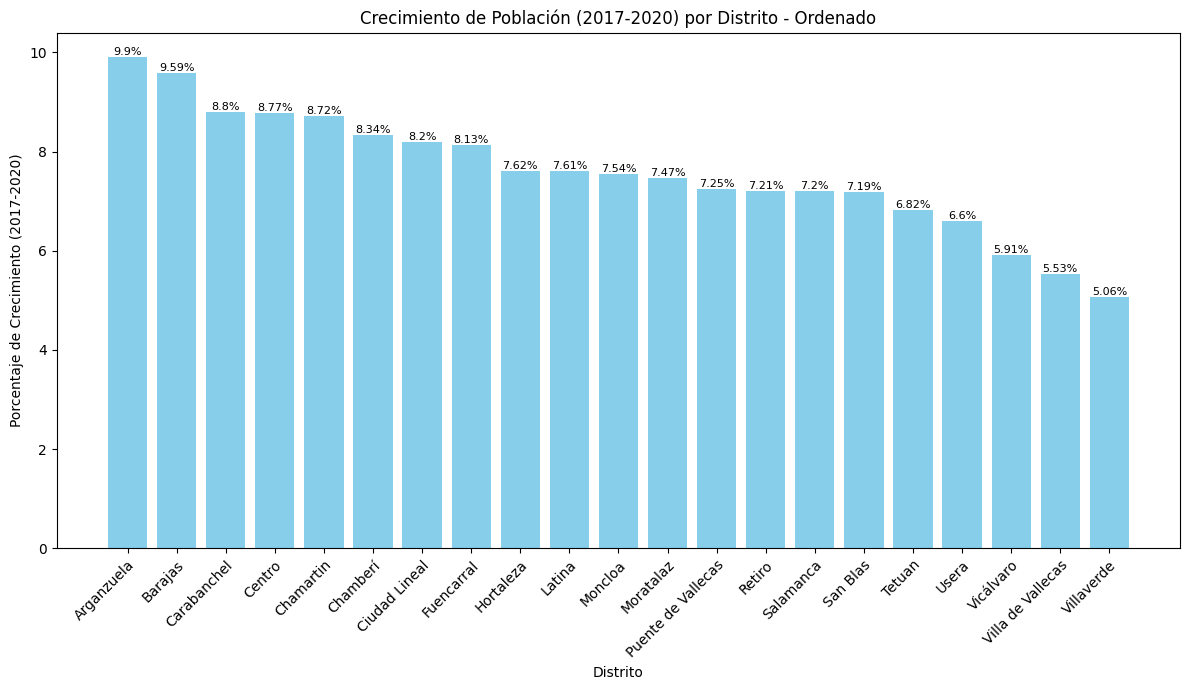

In [75]:
# Crear un gráfico de barras
plt.figure(figsize=(12, 7))
bars = plt.bar(df_renta_madrid['Distrito'], c['Crecimiento_2017_2020'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Distrito')
plt.ylabel('Porcentaje de Crecimiento (2017-2020)')
plt.title('Crecimiento de Población (2017-2020) por Distrito - Ordenado')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=10)

# Añadir etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', 
             ha='center', va='bottom', fontsize=8, color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Dataset = renta_per_capita_malaga.xlsx

Descripcion = Historico de los ultimos 5 años de la renta per capita del Municipio por distrito

Periodo = 2017-2021

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Distrito | El distrito|Categorica nominal|1|
|Numero distrito | Distribucion del numero de distrito al que pertenece el distrito |Numerica discreta |  1 |
| Columnas de los años(2017-2021) | Columnas de la renta per capita por cada año de 2017-2021  |Numerica continua| 0 |
|Municipio | El Municipio al que pertenecen los distritos |Categorica nominal |  2 |

In [76]:
archivo_renta_malaga = "./Renta_per_capita_distrito_top10/renta_per_capita_malaga.xlsx"

# Leer todas las hojas del archivo Excel
df_renta_malaga= pd.read_excel(archivo_renta_malaga, sheet_name="Malaga")
df_renta_malaga

,Distrito,Numero distrito,2017,2018,2019,2020,2021,Municipio
0,Bailén - Miraflores,4,10773,11329,11797,11872,12270,Malaga
1,Campanillas,9,10370,10926,11555,11166,12086,NaN
2,Carretera de Cádiz,7,8377,8856,9341,9389,9977,NaN
3,Centro,1,15534,16506,17423,17124,17522,NaN
4,Churriana,8,9687,10204,10765,10910,11558,NaN
5,Ciudad Jardín,3,12792,13347,14095,13829,13585,NaN
6,Cruz de Humilladero,6,8706,9143,9633,9658,10240,NaN
7,Este,2,14954,15807,16664,16638,17367,NaN
8,Martiricos - La Roca,5,10200,11003,11625,10911,11698,NaN
9,Puerto de la Torre,10,9533,10080,10694,10754,11367,NaN


In [77]:
df_renta_malaga['Crecimiento'] = ((df_renta_malaga[2021] - df_renta_malaga[2017]) / df_renta_malaga[2017]) * 100
print(df_renta_malaga['Crecimiento'])

0     13.895851
1     16.547734
2     19.099916
3     12.797734
4     19.314545
5      6.199187
6     17.620032
7     16.136151
8     14.686275
9     19.238435
10    17.502199
Name: Crecimiento, dtype: float64


Dataset = renta_per_capita_murcia.xlsx

Descripcion = Historico de los ultimos 5 años de la renta per capita del Municipio por distrito

Periodo = 2017-2021

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Distrito | El distrito|Categorica nominal|1|
|Numero distrito | Distribucion del numero de distrito al que pertenece el distrito |Numerica discreta |  1 |
| Columnas de los años(2017-2021) | Columnas de la renta per capita por cada año de 2017-2021  |Numerica continua| 0 |
|Municipio | El Municipio al que pertenecen los distritos |Categorica nominal |  2 |

In [78]:
archivo_renta_murcia = "./Renta_per_capita_distrito_top10/renta_per_capita_murcia.xlsx"

# Leer todas las hojas del archivo Excel
df_renta_murcia= pd.read_excel(archivo_renta_murcia, sheet_name="Murcia")
df_renta_murcia

,Distrito,Numero distrito,2017,2018,2019,2020,2021,Municipio
0,Centro,1,12977,13495,13949,13999,14732,Murcia
1,Norte,2,14285,14903,15568,15615,16278,NaN
2,Pedanias norte,3,10825,11276,11680,11876,12347,NaN
3,Sur,4,10060,10546,11046,11364,11751,NaN
4,Campo de Murcia,5,9573,10007,10477,10619,11210,NaN
5,Pedanias Este,6,8503,8828,9231,9373,9807,NaN
6,Pedanias Oeste,8,7801,8099,8385,8521,9147,NaN


In [79]:
df_renta_murcia['Crecimiento'] = ((df_renta_murcia[2021] - df_renta_murcia[2017]) / df_renta_murcia[2017]) * 100
print(df_renta_murcia['Crecimiento'])
df_renta_murcia



0    13.523927
1    13.951698
2    14.060046
3    16.809145
4    17.100178
5    15.335764
6    17.254198
Name: Crecimiento, dtype: float64


,Distrito,Numero distrito,2017,2018,2019,2020,2021,Municipio,Crecimiento
0,Centro,1,12977,13495,13949,13999,14732,Murcia,13.523927
1,Norte,2,14285,14903,15568,15615,16278,NaN,13.951698
2,Pedanias norte,3,10825,11276,11680,11876,12347,NaN,14.060046
3,Sur,4,10060,10546,11046,11364,11751,NaN,16.809145
4,Campo de Murcia,5,9573,10007,10477,10619,11210,NaN,17.100178
5,Pedanias Este,6,8503,8828,9231,9373,9807,NaN,15.335764
6,Pedanias Oeste,8,7801,8099,8385,8521,9147,NaN,17.254198


In [80]:
d=  df_renta_murcia.sort_values(by='Crecimiento', ascending=False)

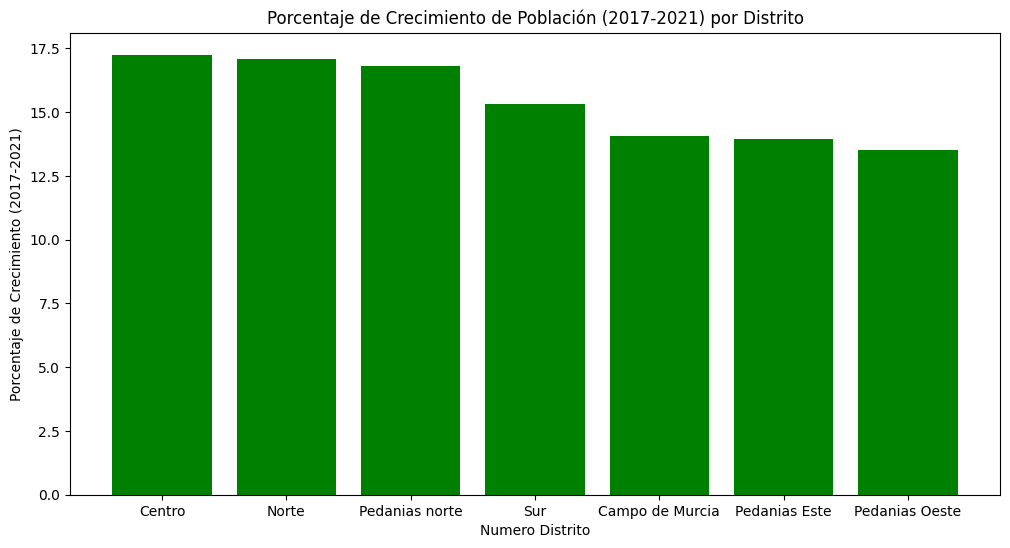

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_renta_murcia['Distrito'], d['Crecimiento'], color='green')
plt.xlabel('Numero Distrito')
plt.ylabel('Porcentaje de Crecimiento (2017-2021)')
plt.title('Porcentaje de Crecimiento de Población (2017-2021) por Distrito')
plt.show()

Dataset = renta_per_capita_valencia.xlsx

Descripcion = Historico de los ultimos 5 años de la renta per capita del Municipio por distrito

Periodo = 2017-2021

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Distrito | El distrito|Categorica nominal|1|
|Numero distrito | Distribucion del numero de distrito al que pertenece el distrito |Numerica discreta |  1 |
| Columnas de los años(2017-2021) | Columnas de la renta per capita por cada año de 2017-2021  |Numerica continua| 0 |
|Municipio | El Municipio al que pertenecen los distritos |Categorica nominal |  2 |

In [81]:
archivo_renta_valencia = "./Renta_per_capita_distrito_top10/renta_per_capita_valencia.xlsx"

# Leer todas las hojas del archivo Excel
df_renta_valencia= pd.read_excel(archivo_renta_valencia, sheet_name="Valencia")
df_renta_valencia

,Distrito,Numero distrito,2017,2018,2019,2020,2021,Municipio
0,Ciutat Vella,1,17076,18810,18756,19009,19299,Valencia
1,L'Eixample,2,18068,19043,19963,20299,20081,NaN
2,Extramurs,3,15193,16058,16719,16794,17347,NaN
3,Campanar,4,13962,14500,15039,15126,15764,NaN
4,La Saïdia,5,11367,12078,12732,13023,13439,NaN
5,El Pla del Real,6,18844,19893,20292,20207,20636,NaN
6,L'Olivereta,7,10250,10663,11158,11410,11790,NaN
7,Patraix,8,11944,12441,13029,13331,13969,NaN
8,Jesús,9,10627,11098,11578,11825,12310,NaN
9,Quatre Carreres,10,10877,11480,12089,12357,12948,NaN


In [ ]:
df_renta_valencia['Crecimiento'] = ((df_renta_valencia[2021] - df_renta_valencia[2017]) / df_renta_valencia[2017]) * 100
print(df_renta_valencia['Crecimiento'])

0     13.018271
1     11.141244
2     14.177582
3     12.906460
4     18.228204
5      9.509658
6     15.024390
7     16.954119
8     15.837019
9     19.040177
10    17.607656
11    15.239173
12    14.880996
13    15.407329
14    17.292714
15    17.268492
Name: Crecimiento, dtype: float64


Dataset = renta_per_capita_vitoria_gasteiz.xlsx

Descripcion = Historico de los ultimos 5 años de la renta per capita del Municipio por distrito

Periodo = 2017-2021

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Distrito | El distrito|Categorica nominal|1|
|Numero distrito | Distribucion del numero de distrito al que pertenece el distrito |Numerica discreta |  1 |
| Columnas de los años(2017-2021) | Columnas de la renta per capita por cada año de 2017-2021  |Numerica continua| 0 |
|Municipio | El Municipio al que pertenecen los distritos |Categorica nominal |  2 |

In [ ]:
archivo_renta_vitoria = "./Renta_per_capita_distrito_top10/renta_per_capita_vitoria_gasteiz.xlsx"

# Leer todas las hojas del archivo Excel
df_renta_vitoria= pd.read_excel(archivo_renta_vitoria, sheet_name="Vitoria Gasteiz")
df_renta_vitoria

,Distrito,Numero distrito,2017,2018,2019,2020,2021,Municipio
0,Casco Viejo,1,NaN,15180,NaN,15180,15180,Vitoria Gasteiz
1,Lovaina - Aranzabal,1,NaN,15180,NaN,15180,15180,NaN
2,Judimendi - Sta.Lucía,1,NaN,15180,NaN,15180,15180,NaN
3,Coronación,1,NaN,15180,NaN,15180,15180,NaN
4,Centro,1,NaN,15180,NaN,15180,15180,NaN
5,San Martín,2,NaN,17670,NaN,17670,17670,NaN
6,Txagorritxu - El Pilar,2,NaN,17670,NaN,17670,17670,NaN
7,Armentia - Ciudad Jardín,2,NaN,17670,NaN,17670,17670,NaN
8,Aranzabela - Aranbizkarra,2,NaN,17670,NaN,17670,17670,NaN
9,Zabalgana - Ariznabarra,3,NaN,14248,NaN,14248,14248,NaN


In [ ]:
df_renta_vitoria_sin_nulos= df_renta_vitoria.dropna(subset=[2017,2019])

In [ ]:
df_renta_vitoria_sin_nulos['Crecimiento'] = ((df_renta_vitoria_sin_nulos[2021] - df_renta_vitoria_sin_nulos[2017]) / df_renta_vitoria_sin_nulos[2017]) * 100
print(df_renta_vitoria_sin_nulos['Crecimiento'])

Series([], Name: Crecimiento, dtype: float64)


Dataset = renta_per_capita_zaragoza.xlsx

Descripcion = Historico de los ultimos 5 años de la renta per capita del Municipio por distrito

Periodo = 2017-2021

| Columna | Descripcion| Tipo de variable  | Importancia| 
|--------------|--------------|--------------|--------------| 
| Distrito | El distrito|Categorica nominal|1|
|Numero distrito | Distribucion del numero de distrito al que pertenece el distrito |Numerica discreta |  1 |
| Columnas de los años(2017-2021) | Columnas de la renta per capita por cada año de 2017-2021  |Numerica continua| 0 |
|Municipio | El Municipio al que pertenecen los distritos |Categorica nominal |  2 |

In [ ]:
archivo_renta_zaragoza = "./Renta_per_capita_distrito_top10/renta_per_capita_zaragoza.xlsx"

# Leer todas las hojas del archivo Excel
df_renta_zaragoza= pd.read_excel(archivo_renta_zaragoza, sheet_name="Zaragoza")
df_renta_zaragoza

,Distrito,Numero distrito,2017,2018,2019,2020,2021,Municipio
0,Casco Historico,1,12375,12748,13260,13248,13900,Zaragoza
1,Pol universidad Romareda,2,18648,19233,19808,19950,20162,NaN
2,Delicias,3,11833,12213,12594,12630,13126,NaN
3,Centro,4,16259,16708,17159,17316,17647,NaN
4,La Jota,5,12214,12627,12915,13048,13563,NaN
5,Casetas - Garrapinillos - Monzalbarba,6,10954,11431,11705,11772,12248,NaN
6,Miralbueno-Bombvarda,7,13181,13786,14304,14280,14981,NaN
7,Miraflores San Jose,8,12758,13243,13662,13828,14232,NaN
8,Torrero - La Paz,9,11323,11793,12194,12275,12761,NaN
9,Ruiseñores,10,12381,12832,13421,13578,14065,NaN


In [ ]:
df_renta_zaragoza['Crecimiento'] = ((df_renta_zaragoza[2021] - df_renta_zaragoza[2017]) / df_renta_zaragoza[2017]) * 100
print(df_renta_zaragoza['Crecimiento'])

0     12.323232
1      8.118833
2     10.927068
3      8.536810
4     11.044703
5     11.813036
6     13.656020
7     11.553535
8     12.699815
9     13.601486
10    12.231457
11    10.301175
Name: Crecimiento, dtype: float64


In [ ]:
df_renta_zaragoza.describe()

,Numero distrito,2017,2018,2019,2020,2021,Crecimiento
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,13063.833333,13537.916667,13969.250000,14060.166667,14527.500000,11.400598
std,3.605551,2199.405739,2237.828146,2292.671769,2316.653497,2237.446089,1.755116
min,1.000000,10954.000000,11431.000000,11705.000000,11772.000000,12248.000000,8.118833
25%,3.750000,12022.750000,12368.250000,12800.250000,12878.250000,13279.750000,10.770595
50%,6.500000,12378.000000,12790.000000,13340.500000,13413.000000,13982.500000,11.683286
75%,9.250000,12863.750000,13512.250000,13881.000000,13947.000000,14480.750000,12.417378
max,12.000000,18648.000000,19233.000000,19808.000000,19950.000000,20162.000000,13.656020
